# Synthetic examples
Here are some examples on how to run ISTDECO on simulated data.

##### Some notation:
- $r$ Number of imaging rounds
- $c$ Number of channels
- $m$ Number of codes in codebook
- $h$ Image height
- $w$ Image width
- $\sigma_{psf}$ Standard deviation of the Gaussians describing the spatial shape of the spots
- $Y \in \mathbb{R}_+^{r\times c \times h \times w}$ Image data
- $D \in \mathbb{R}_+^{m \times r\times c}$ Codebook (Combinatorial labels)
- $b \in \mathbb{R}_+^{m \times r\times c}$ Background

## 1D example
First we generate some sythetic data. Everything we do here is in 1D (since it is much easier to visualise). 

69.91425102221828


<IPython.core.display.Javascript object>


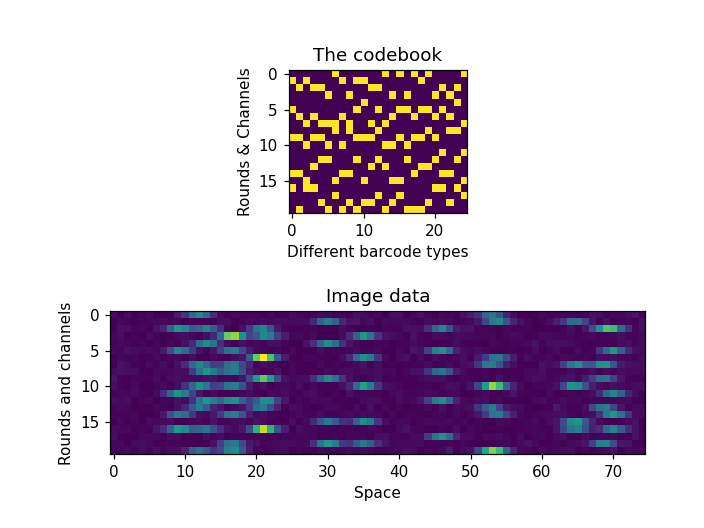

In [1]:
import numpy as np
from istdeco import ISTDeco
from utils import random_codebook, random_image_stack
import matplotlib.pyplot as plt
%matplotlib notebook

ndim = 1

# Number of rounds
r = 5

# Number of channels
c = 4

# Number of codes in the codebook
m = 25

# Spatial dimensions (y, x)
space = (1,75)

# Standard deviation for the shapes of spots. 
psf = 1.2

# Number of spots
n_signals = 15

# Create a random codebook
codebook = random_codebook(n_codes=m, n_rounds=r, n_channels=c)

# Create some image data
image_data, gt = random_image_stack(codebook, n_signals, ndim, signal_std=psf, im_shape=space)

# PLOT!
plt.subplot(211)
plt.imshow(codebook.reshape(m,-1).T)
plt.title('The codebook')
plt.ylabel('Rounds & Channels')
plt.xlabel('Different barcode types')

plt.subplot(212)
plt.imshow(image_data.reshape(r*c,-1))
plt.title('Image data')
plt.xlabel('Space')
plt.ylabel('Rounds and channels')

plt.tight_layout(pad=3.0)

Let's run ISTDECO on the simulated images and plot the deconvolved images.

<IPython.core.display.Javascript object>


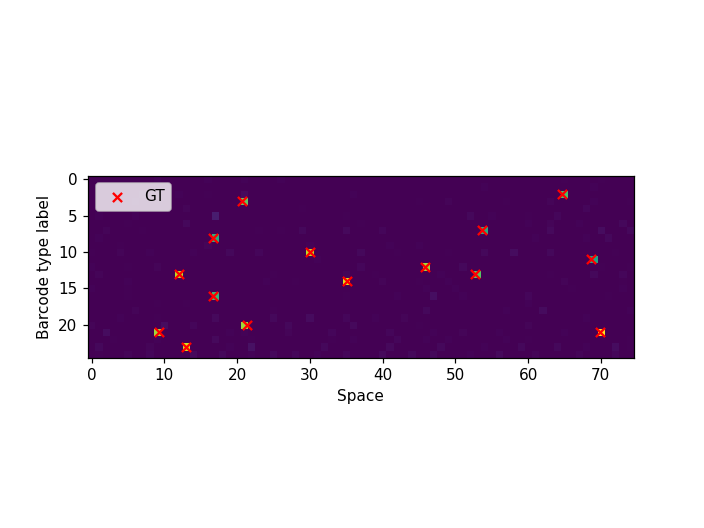

In [2]:
psf_std = (0, 1.2)
model = ISTDeco(image_data, codebook, psf_std)
X, Q, loss = model.run()

plt.figure()
plt.imshow(X.squeeze())
plt.scatter(gt[:,0],gt[:,2], label='GT', color='red', marker='x')
plt.xlabel('Space')
plt.ylabel('Barcode type label')
plt.legend()

## Dense 1D Example
Another 1D example but with a much higher spot density.

67.38222846171828


<IPython.core.display.Javascript object>


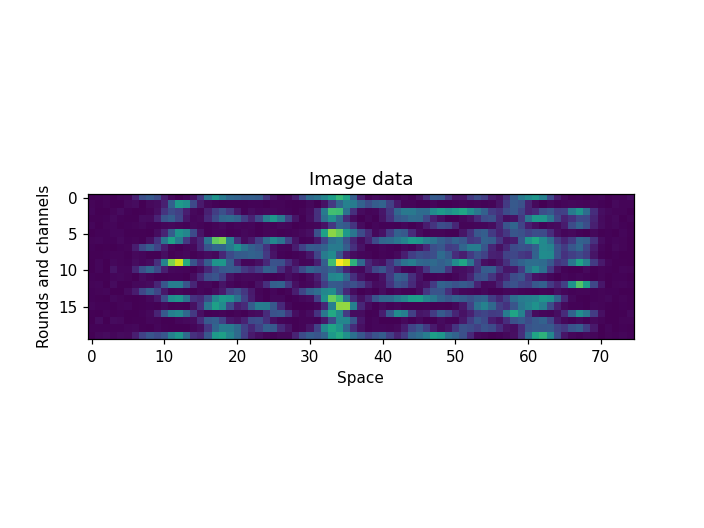

Text(0, 0.5, 'Rounds and channels')

In [3]:
n_spots = 50   # Number of signals


# Create some image data
dense_image_data, dense_gt = \
    random_image_stack(codebook, n_spots, ndim, signal_std=psf, im_shape=space)


plt.figure()
plt.imshow(dense_image_data.reshape(r*c,-1))
plt.title('Image data')
plt.xlabel('Space')
plt.ylabel('Rounds and channels')

<IPython.core.display.Javascript object>


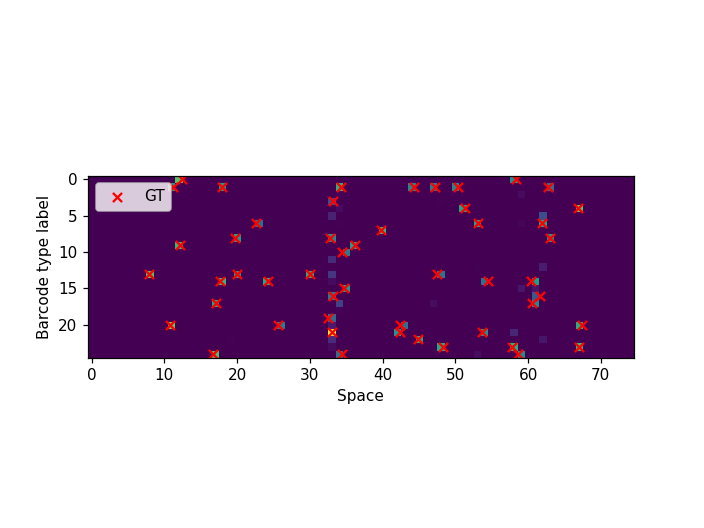

In [4]:
model = ISTDeco(dense_image_data, codebook, psf_std, b=10)
X, _, loss = model.run(niter=100)

plt.figure()
plt.imshow(X.squeeze())
plt.scatter(dense_gt[:,0],dense_gt[:,2], label='GT', color='red', marker='x')
plt.xlabel('Space')
plt.ylabel('Barcode type label')
plt.legend()